In [1]:
import numpy as np # 넘파이, 수치해석용 파이썬 패키지지
import io #웹정보를 제공하는 정해진 알고리즘으로 불러와 사용자에게 필요한 정보로 변환
import pandas as pd #  파이썬에서 표 형태의 데이터를 탐색하고 분석하는데 사용하는 라이브러리

import matplotlib as mpl # 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지
import matplotlib.pyplot as plt # MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음
import seaborn as sns # Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

import warnings # 워닝 메세지 안뜨게 하기 위해서

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #높은 해상도의 그래프 출력

mpl.rc('font', family = 'malgun_gothic') # 글자체 고딕
mpl.rc('axes', unicode_minus=False) # 유니코드 마이너스 오류 안뜨게

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore') # 에러 메세지 무시

In [3]:
# 지드라이브와 연결
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [47]:
# 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리
from sklearn.model_selection import train_test_split # 원본 데이터를 알아서 훈련 세트와 테스트 세트로 나눠줌줌
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# accuracy_score: 정답률( =정확도 )  (TP + TN) / (TP + TN + FP + FN) 진짜인걸 맞춘거 + 가짜인걸 맞춘거 / 전체
# precision_score: 정밀도  TP / (FP + TP) 진짜인걸 맞춘거 / 긍정적 예측을 실패한것(실제론 썩은밤) + 진짜인걸 맞춘거
# recall_score: 재현율 TP / (FN + TP) 진짜인걸 맞춘거 / 부정적인 예측을 실패한것(실제론 맛있는 밤) + 진짜인걸 맞춘거
# roc_auc_score:  167p 공룡, 이진 분류의 예측 성능 측정에 중요하게 사용되는 지표

from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
# f1_score: 정밀도 * 재현율 / 정밀도 + 재현율
# precision_recall_curve: Parameter인 Threshold를 변화시키면서 Precision과 Recall을 Plot 한 Curve입니다. 
## Precision-Recall Curves는 X축으로는 Recall을, Y축으로는 Precision을 가집니다.
## Precision-Recall Curve는 단조함수가 아닙니다. 이러한 이유로 ROC Curve보다 직관적이지 못하다는 단점을 가집니다.
# roc_curve: FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 변화를 나타내는 곡선

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

house_train = pd.read_csv('/content/gdrive/MyDrive/kaggle/train.csv')
house_test = pd.read_csv('/content/gdrive/MyDrive/kaggle/test.csv')
house_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [48]:
house_train_scatter_color = house_train.copy()

In [49]:
def find_outlier(data):
    for i in data.columns:
        if data[i].dtype != object:
            q1, q3 = np.percentile(data[i], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - (iqr * 1.5)
            upper_bound = q3 + (iqr * 1.5)
            mask = np.where((data[i] > upper_bound) | (data[i]< lower_bound))
            a = i +'_col'
            data[a] = 'blue'
            for j in mask:
                data[a][j] = 'red'

In [50]:
# int 타입의 범주형들의 형태를 바꾸어 줍니다.
#house_train_scatter_color[''] = house_train_scatter_color[''].astype(str)
#house_train_scatter_color[''] = house_train_scatter_color[''].astype(str)
#house_train_scatter_color[''] = house_train_scatter_color[''].astype(str)
house_train_scatter_color['FullBath'] = house_train_scatter_color['FullBath'].astype(str)
house_train_scatter_color['MoSold'] = house_train_scatter_color['MoSold'].astype(str)
house_train_scatter_color['GarageCars'] = house_train_scatter_color['GarageCars'].astype(str)
house_train_scatter_color['Fireplaces'] = house_train_scatter_color['Fireplaces'].astype(str)
house_train_scatter_color['TotRmsAbvGrd'] = house_train_scatter_color['TotRmsAbvGrd'].astype(str)
house_train_scatter_color['KitchenAbvGr'] = house_train_scatter_color['KitchenAbvGr'].astype(str)
house_train_scatter_color['BedroomAbvGr'] = house_train_scatter_color['BedroomAbvGr'].astype(str)
house_train_scatter_color['HalfBath'] = house_train_scatter_color['HalfBath'].astype(str)
house_train_scatter_color['BsmtFullBath'] = house_train_scatter_color['BsmtFullBath'].astype(str)
house_train_scatter_color['BsmtHalfBath'] = house_train_scatter_color['BsmtHalfBath'].astype(str)
house_train_scatter_color['BsmtFullBath'] = house_train_scatter_color['BsmtFullBath'].astype(str)
house_train_scatter_color['YrSold'] = house_train_scatter_color['YrSold'].astype(str)
house_train_scatter_color['MoSold'] = house_train_scatter_color['MoSold'].astype(str)
house_train_scatter_color['GarageYrBlt'] = house_train_scatter_color['GarageYrBlt'].astype(str)
house_train_scatter_color['YearRemodAdd'] = house_train_scatter_color['YearRemodAdd'].astype(str)
house_train_scatter_color['YearBuilt'] = house_train_scatter_color['YearBuilt'].astype(str)
house_train_scatter_color['OverallQual'] = house_train_scatter_color['OverallQual'].astype(str)
house_train_scatter_color['MSSubClass'] = house_train_scatter_color['MSSubClass'].astype(str)
house_train_scatter_color['OverallCond'] = house_train_scatter_color['OverallCond'].astype(str)
house_train_scatter_color['YrSold'] = house_train_scatter_color['YrSold'].astype(str)
house_train_scatter_color['MoSold'] = house_train_scatter_color['MoSold'].astype(str)

In [51]:
house_train_scatter_color_numeric = house_train_scatter_color[house_train_scatter_color.dtypes[house_train_scatter_color.dtypes != object].index].drop('Id', axis = 1)

In [52]:
house_train_scatter_color_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


In [53]:
################################################################################
########################### 변수명 수정 할 것
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = house_train_scatter_color_numeric.dtypes[house_train_scatter_color_numeric.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = house_train_scatter_color_numeric[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
BsmtFinSF2        4.250888
ScreenPorch       4.117977
EnclosedPorch     3.086696
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [54]:
house_train_scatter_color_numeric[skew_features_top.index] = np.log1p(house_train_scatter_color_numeric[skew_features_top.index])

In [69]:
house_train_scatter_color_numeric[skew_features_top.index]

,LotArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,9.042040,6.561031,0.000000,6.753438,6.753438,0.0,7.444833,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,12.247699
1,9.169623,6.886532,0.000000,7.141245,7.141245,0.0,7.141245,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.109016
2,9.328212,6.188264,0.000000,6.825460,6.825460,0.0,7.488294,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,12.317171
3,9.164401,5.379897,0.000000,6.629363,6.869014,0.0,7.448916,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,11.849405
4,9.565284,6.486161,0.000000,7.044033,7.044033,0.0,7.695758,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8.976894,0.000000,0.000000,6.860664,6.860664,0.0,7.407318,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,12.072547
1456,9.486152,6.673298,5.099866,7.341484,7.637234,0.0,7.637234,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.254868
1457,9.109746,5.620401,0.000000,7.050123,7.080868,0.0,7.758333,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,12.493133
1458,9.181735,3.912023,6.937314,6.983790,6.983790,0.0,6.983790,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,11.864469


In [70]:
house_train_scatter_color_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,9.042040,196.0,6.561031,0.000000,150,6.753438,6.753438,854,0.0,7.444833,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,12.247699
1,80.0,9.169623,0.0,6.886532,0.000000,284,7.141245,7.141245,0,0.0,7.141245,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.109016
2,68.0,9.328212,162.0,6.188264,0.000000,434,6.825460,6.825460,866,0.0,7.488294,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,12.317171
3,60.0,9.164401,0.0,5.379897,0.000000,540,6.629363,6.869014,756,0.0,7.448916,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,11.849405
4,84.0,9.565284,350.0,6.486161,0.000000,490,7.044033,7.044033,1053,0.0,7.695758,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.976894,0.0,0.000000,0.000000,953,6.860664,6.860664,694,0.0,7.407318,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,12.072547
1456,85.0,9.486152,119.0,6.673298,5.099866,589,7.341484,7.637234,0,0.0,7.637234,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.254868
1457,66.0,9.109746,0.0,5.620401,0.000000,877,7.050123,7.080868,1152,0.0,7.758333,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,12.493133
1458,68.0,9.181735,0.0,3.912023,6.937314,0,6.983790,6.983790,0,0.0,6.983790,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,11.864469


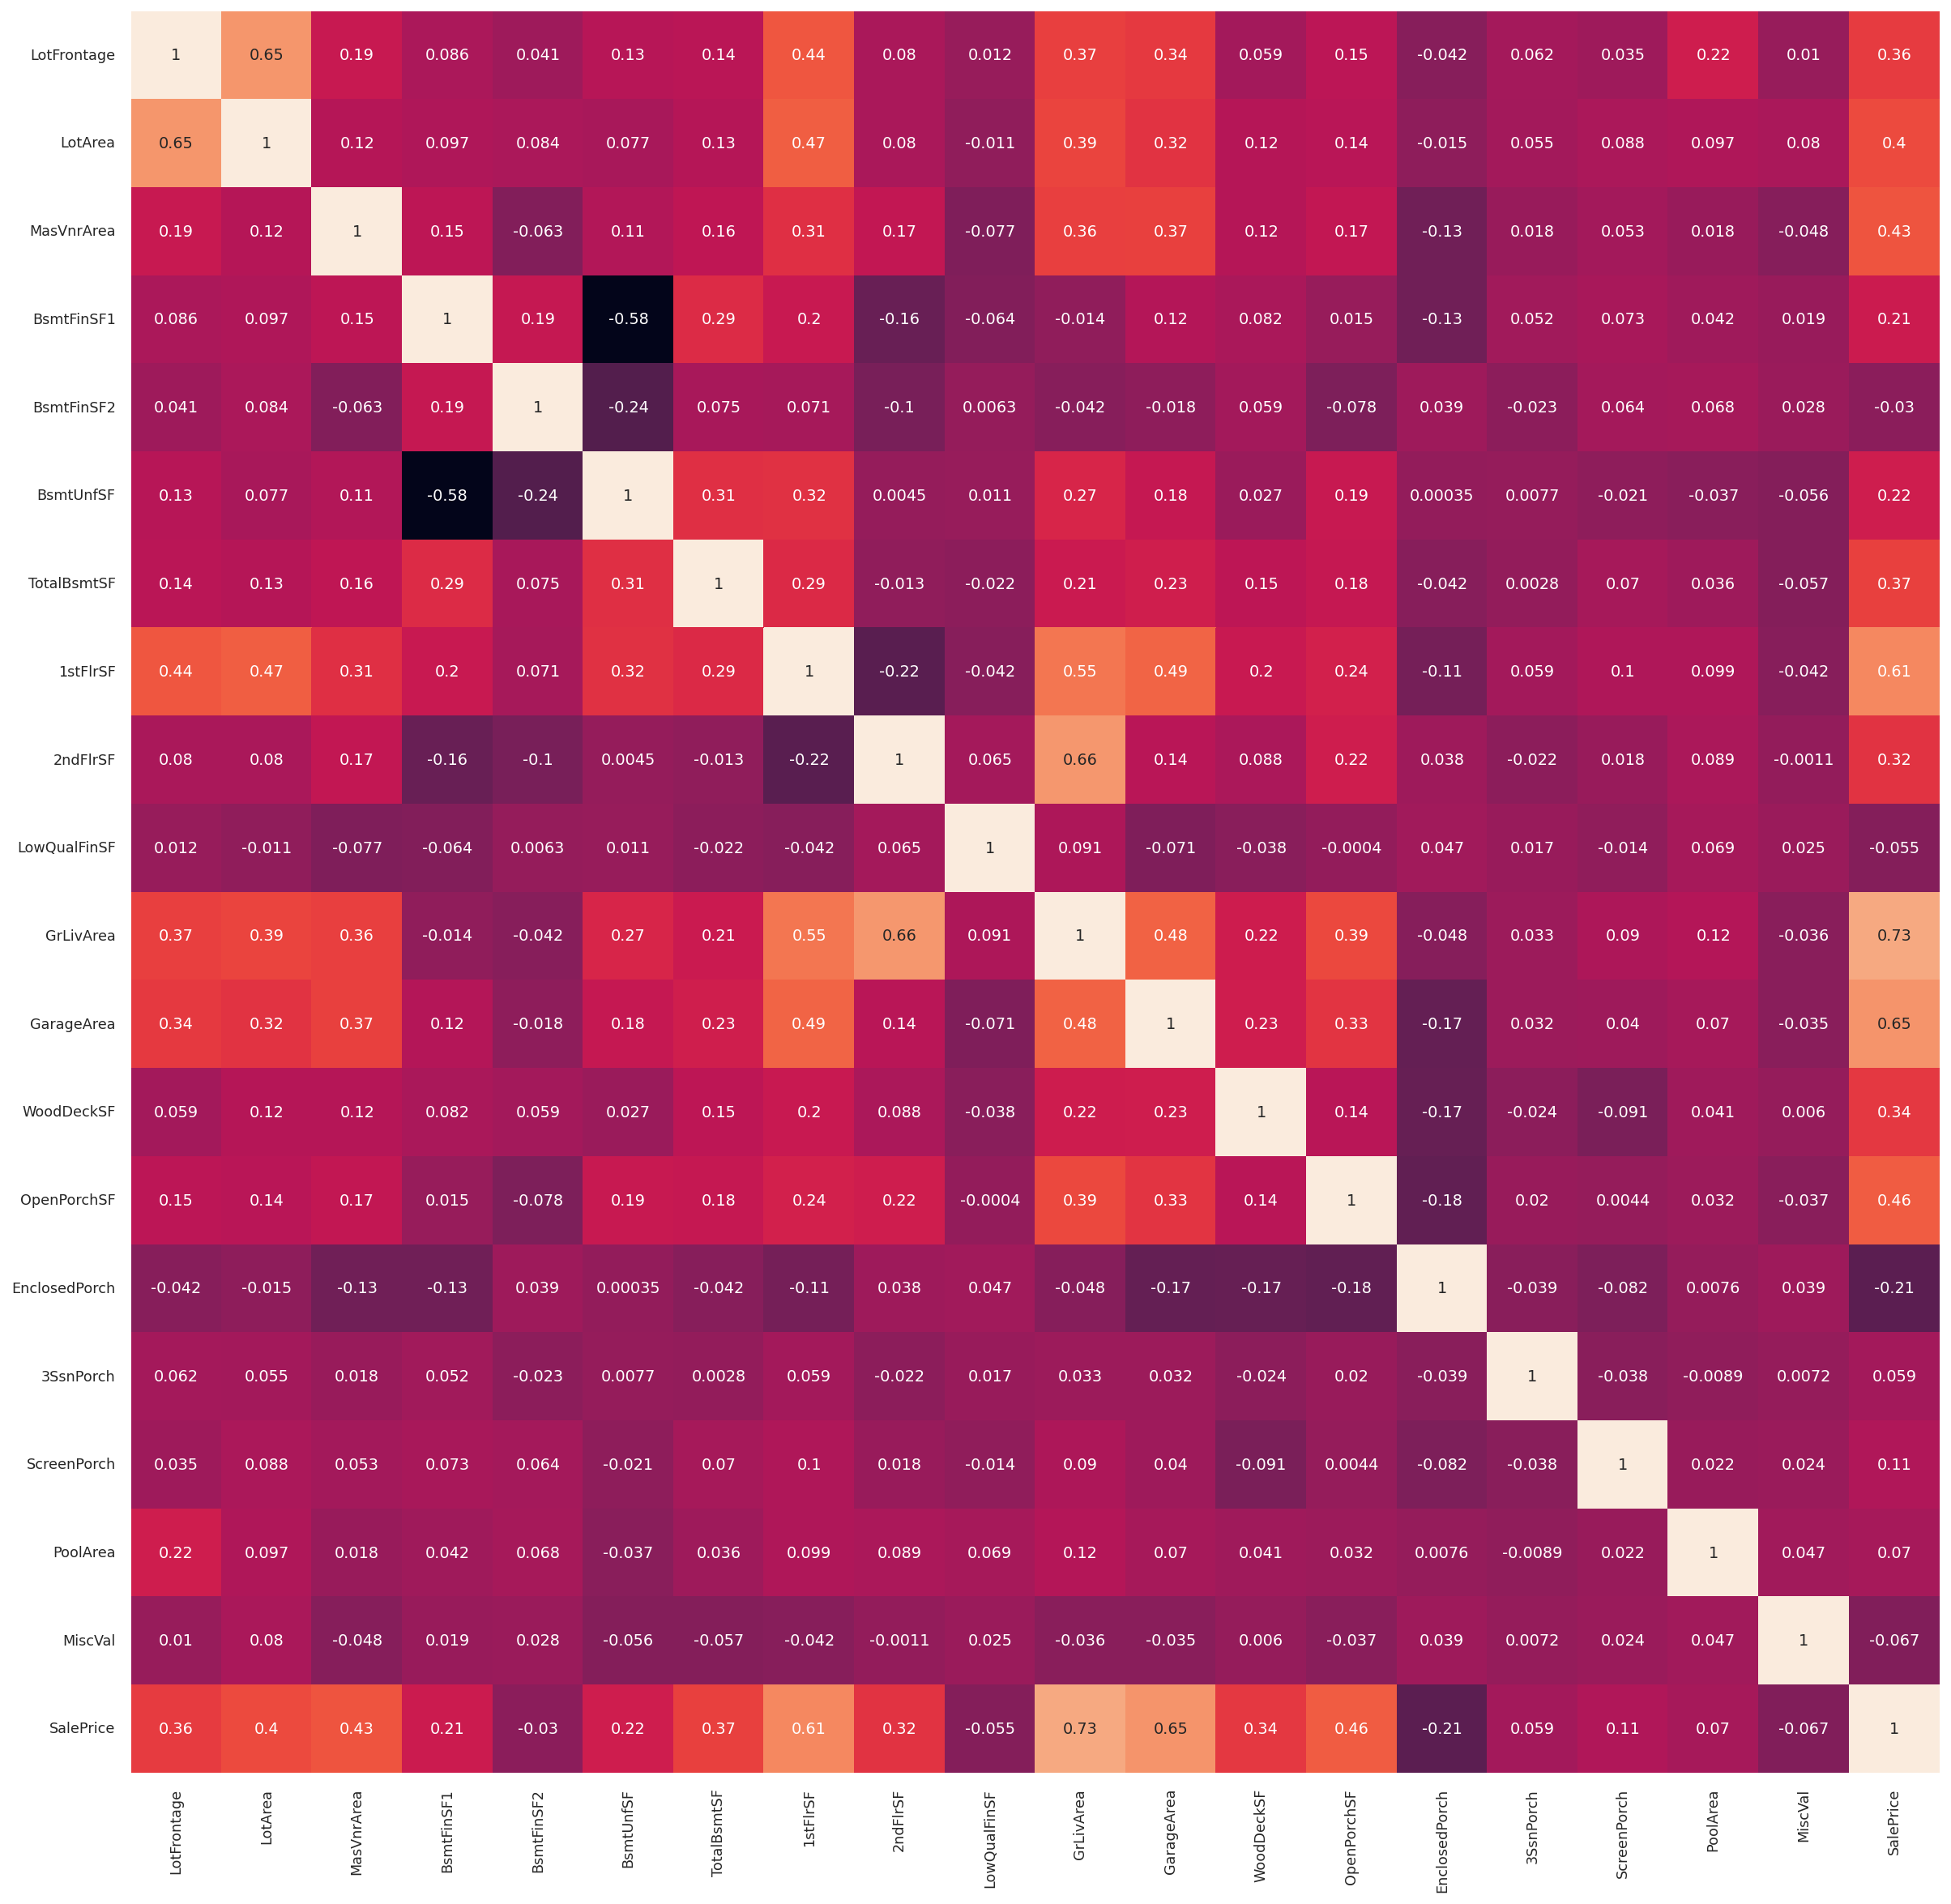

In [71]:
house_train_scatter_color_numeric_corr = house_train_scatter_color_numeric.corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)
sns.heatmap(house_train_scatter_color_numeric_corr, annot=True, cbar=False)
plt.show()

In [72]:
# 로그 변환 후 상괸관계가 떨어지는 것도 올라가는 것도 있다.
# 그럼에도 여전히 낮은 상관관계를 가지는것들은 드랍 하기로 생각

In [73]:
# 이상치를 판단 할 때 스텐다드나 민 맥스를 사용한 뒤
# 교집된 이상치를 이상치로 판단하고 제가하는 방향성이 좋지 않을까

In [60]:
house_train_scatter_color_numeric['LowQualFinSF'].value_counts()

0.000000    1434
4.394449       3
5.888878       2
5.327876       1
6.173786       1
5.986452       1
6.244167       1
4.795791       1
6.177944       1
5.451038       1
3.988984       1
6.246107       1
5.056246       1
6.161207       1
6.042633       1
5.968708       1
5.918894       1
5.973810       1
4.976734       1
6.350886       1
6.270988       1
5.459586       1
6.242223       1
5.953243       1
Name: LowQualFinSF, dtype: int64

In [61]:
for i in house_train_scatter_color_numeric.columns:
  print(house_train_scatter_color_numeric[i].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
8.881975    25
9.169623    24
8.699681    17
9.105091    14
9.036106    14
            ..
9.588914     1
9.523909     1
8.308692     1
9.747126     1
9.181735     1
Name: LotArea, Length: 1073, dtype: int64
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
0.000000    467
3.218876     12
2.833213      9
6.532334      5
6.496775      5
           ... 
7.199678      1
7.189168      1
7.286876      1
5.796058      1
6.722630      1
Name: BsmtFinSF1, Length: 637, dtype: int64
0.000000    1293
5.198497       5
5.926926       3
6.313548       2
4.997212       2
            ... 
6.278521       1
5.111988       1
7.021976       1
5.743003       1
6.937314       1
Name: BsmtF

In [ ]:
# - MiscVal
# - PoolArea
# - ScreenPorch
# - 3SsnPorch
# - EnclosedPorch
# - LowQualFinSF
# - BsmtFinSF2

In [ ]:
house_train_scatter_color_numeric

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


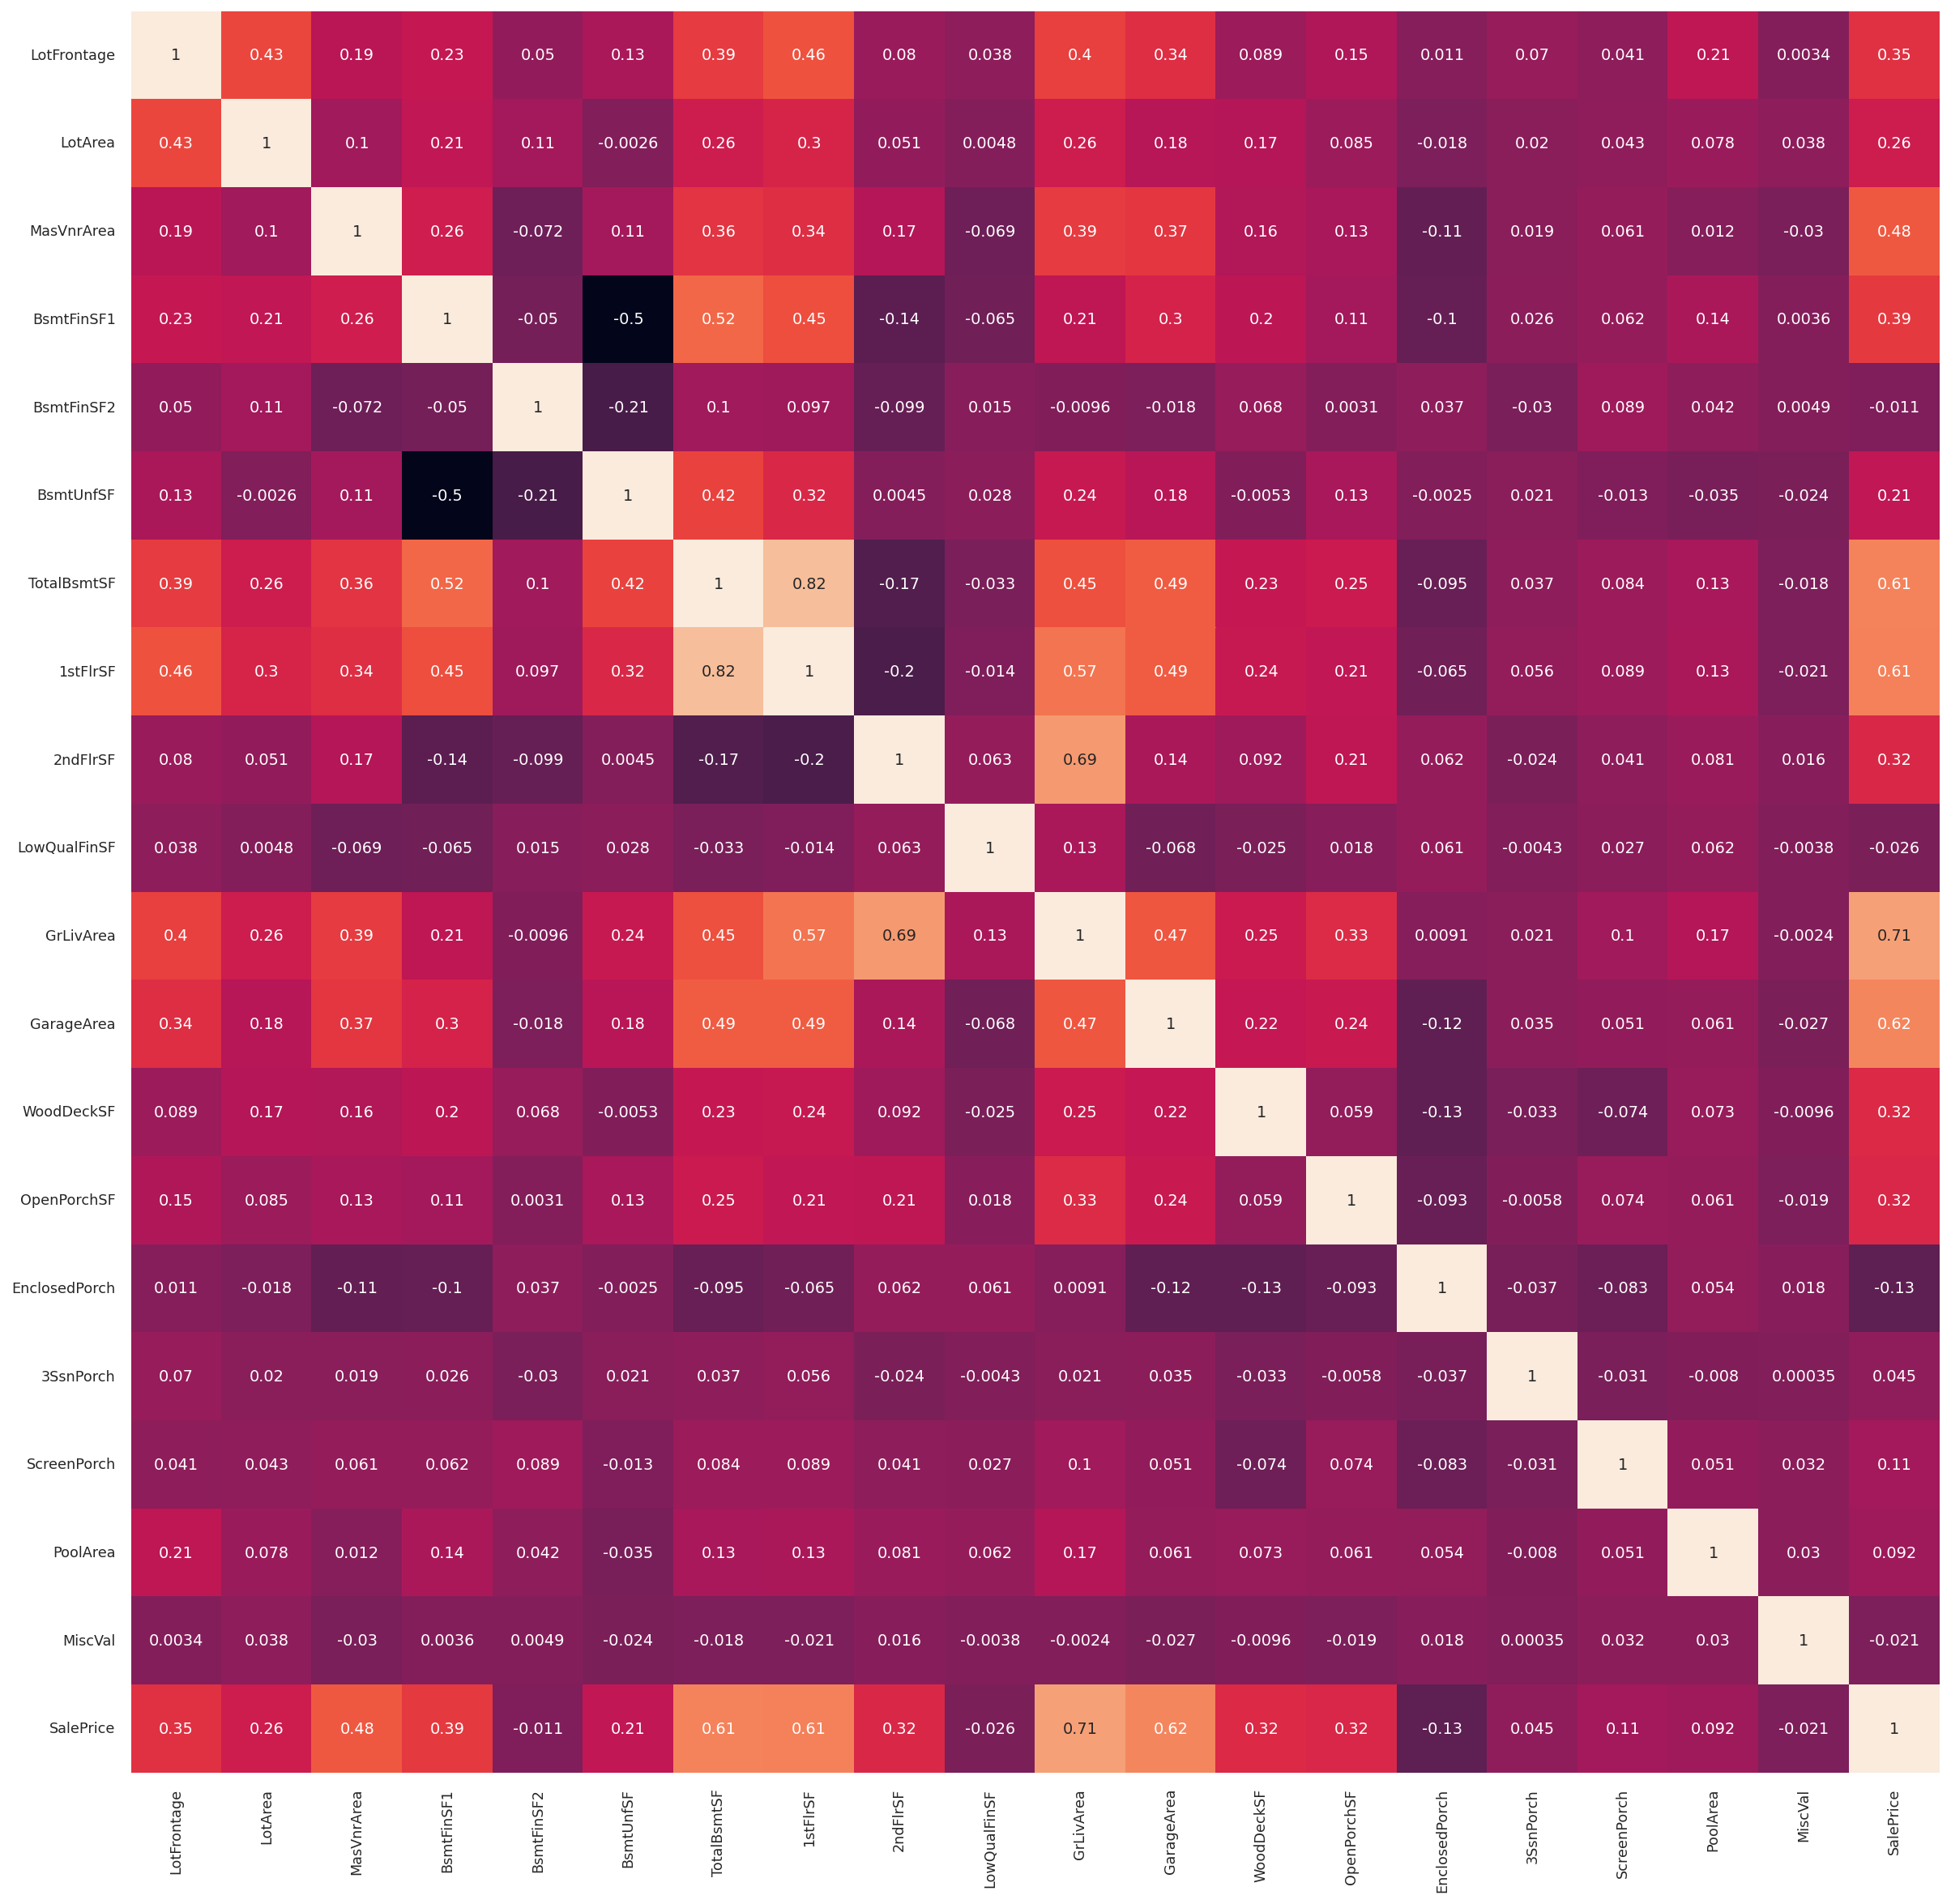

In [ ]:
house_train_scatter_color_numeric_corr = house_train_scatter_color_numeric.corr()
plt.figure(figsize=(20, 20))
sns.set(font_scale=0.8)
sns.heatmap(house_train_scatter_color_numeric_corr, annot=True, cbar=False)
plt.show()

In [74]:
huse_train_numeric_droped = house_train_scatter_color_numeric#.drop(['MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'BsmtFinSF2'], axis =1)
huse_train_numeric_droped

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,9.042040,196.0,6.561031,0.000000,150,6.753438,6.753438,854,0.0,7.444833,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,12.247699
1,80.0,9.169623,0.0,6.886532,0.000000,284,7.141245,7.141245,0,0.0,7.141245,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.109016
2,68.0,9.328212,162.0,6.188264,0.000000,434,6.825460,6.825460,866,0.0,7.488294,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,12.317171
3,60.0,9.164401,0.0,5.379897,0.000000,540,6.629363,6.869014,756,0.0,7.448916,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,11.849405
4,84.0,9.565284,350.0,6.486161,0.000000,490,7.044033,7.044033,1053,0.0,7.695758,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,8.976894,0.0,0.000000,0.000000,953,6.860664,6.860664,694,0.0,7.407318,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,12.072547
1456,85.0,9.486152,119.0,6.673298,5.099866,589,7.341484,7.637234,0,0.0,7.637234,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.254868
1457,66.0,9.109746,0.0,5.620401,0.000000,877,7.050123,7.080868,1152,0.0,7.758333,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,12.493133
1458,68.0,9.181735,0.0,3.912023,6.937314,0,6.983790,6.983790,0,0.0,6.983790,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,11.864469


In [75]:
huse_train_numeric_droped_columns = huse_train_numeric_droped.drop(['SalePrice'], axis = 1).columns

In [76]:
# 0이 전부 > 영향이 없음
# 0이 대부분 > 영향이 적음or  영향이 거의 없음
# > 해당칼럼의 값이 0일때 타겟값이 일정하고 양 또는 음의 상관관계도 있지 않을까?
# > 생각보다 더 높은 상관관계
# 알고보니 컬럼명이 아래에 뜨는거였음

In [77]:
c_huse_train_numeric_droped = huse_train_numeric_droped.copy()

In [78]:
c_huse_train_numeric_droped.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [79]:
c_huse_train_numeric_droped = c_huse_train_numeric_droped.fillna(c_huse_train_numeric_droped.loc[:, "LotFrontage"].median())

In [80]:
# 타겟 로그 스케일
#c_huse_train_numeric_droped['SalePrice'] = np.log(c_huse_train_numeric_droped['SalePrice'])

In [81]:
c_huse_train_numeric_droped_data = c_huse_train_numeric_droped.iloc[:, :-1]
c_huse_train_numeric_droped_target = c_huse_train_numeric_droped.iloc[:, -1]

In [86]:
house_train_numeric_droped_columns = ['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']
house_train_numeric_droped_columns = c_huse_train_numeric_droped_data.columns
def get_scaled_data(input_data=None):
  global scaled_ss_data
  global scaled_mm_data
  global scaled_lg_data
  scaled_ss_data = StandardScaler().fit_transform(input_data)
  scaled_ss_data = pd.DataFrame(scaled_ss_data)
  scaled_ss_data.columns = house_train_numeric_droped_columns

  scaled_mm_data = MinMaxScaler().fit_transform(input_data)
  scaled_mm_data = pd.DataFrame(scaled_mm_data)
  scaled_mm_data.columns = house_train_numeric_droped_columns

  scaled_lg_data = np.log1p(input_data)
  scaled_lg_data = pd.DataFrame(scaled_lg_data)
  scaled_lg_data.columns = house_train_numeric_droped_columns 


  non_scaled_data = input_data
  return scaled_ss_data, scaled_mm_data, scaled_lg_data, non_scaled_data

In [87]:
get_scaled_data(c_huse_train_numeric_droped_data)

(      LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
 0       -0.220875 -0.133270    0.512420    0.779431   -0.355342  -0.944591   
 1        0.460320  0.113413   -0.573300    0.888257   -0.355342  -0.641228   
 2       -0.084636  0.420049    0.324081    0.654803   -0.355342  -0.301643   
 3       -0.447940  0.103317   -0.573300    0.384539   -0.355342  -0.061670   
 4        0.641972  0.878431    1.365485    0.754400   -0.355342  -0.174865   
 ...           ...       ...         ...         ...         ...        ...   
 1455    -0.357114 -0.259231   -0.573300   -1.414140   -0.355342   0.873321   
 1456     0.687385  0.725429    0.085887    0.816966    2.409693   0.049262   
 1457    -0.175462 -0.002359   -0.573300    0.464947   -0.355342   0.701265   
 1458    -0.084636  0.136833   -0.573300   -0.106220    3.405917  -1.284176   
 1459     0.233255  0.180116   -0.573300    0.833459    2.720609  -0.976285   
 
       TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFin

In [88]:
scaled_ss_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.220875,-0.133270,0.512420,0.779431,-0.355342,-0.944591,0.002513,-0.803645,1.161852,-0.133602,0.529194,0.351000,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
1,0.460320,0.113413,-0.573300,0.888257,-0.355342,-0.641228,0.341114,0.418479,-0.795163,-0.133602,-0.381965,-0.060731,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
2,-0.084636,0.420049,0.324081,0.654803,-0.355342,-0.301643,0.065397,-0.576677,1.189351,-0.133602,0.659631,0.631726,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
3,-0.447940,0.103317,-0.573300,0.384539,-0.355342,-0.061670,-0.105819,-0.439421,0.937276,-0.133602,0.541448,0.790804,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,-0.190481
4,0.641972,0.878431,1.365485,0.754400,-0.355342,-0.174865,0.256237,0.112127,1.617877,-0.133602,1.282295,1.698485,1.080884,0.991848,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.259231,-0.573300,-1.414140,-0.355342,0.873321,0.096134,-0.465737,0.795198,-0.133602,0.416598,-0.060731,-0.946701,0.653002,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
1456,0.687385,0.725429,0.085887,0.816966,2.409693,0.049262,0.515947,1.981524,-0.795163,-0.133602,1.106648,0.126420,1.310217,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
1457,-0.175462,-0.002359,-0.573300,0.464947,-0.355342,0.701265,0.261554,0.228208,1.844744,-0.133602,1.470102,-1.033914,-0.946701,0.837652,-0.404244,-0.128521,-0.292769,-0.069393,6.193644
1458,-0.084636,0.136833,-0.573300,-0.106220,3.405917,-1.284176,0.203637,-0.077721,-0.795163,-0.133602,-0.854536,-1.090059,1.328490,-1.072916,2.333532,-0.128521,-0.292769,-0.069393,-0.190481


In [ ]:
scaled_mm_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,0.150685,0.033420,0.122500,0.125089,0.064212,0.140098,0.119780,0.413559,0.259231,0.386460,0.000000,0.111517
1,0.202055,0.038795,0.000000,0.173281,0.121575,0.206547,0.212942,0.000000,0.174830,0.324401,0.347725,0.000000
2,0.160959,0.046507,0.101250,0.086109,0.185788,0.150573,0.134465,0.419370,0.273549,0.428773,0.000000,0.076782
3,0.133562,0.038561,0.000000,0.038271,0.231164,0.123732,0.143873,0.366102,0.260550,0.452750,0.000000,0.063985
4,0.215753,0.060576,0.218750,0.116052,0.209760,0.187398,0.186095,0.509927,0.351168,0.589563,0.224037,0.153565
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.140411,0.030929,0.000000,0.000000,0.407962,0.155974,0.142038,0.336077,0.247362,0.324401,0.000000,0.073126
1456,0.219178,0.055505,0.074375,0.139972,0.252140,0.252373,0.399036,0.000000,0.327619,0.352609,0.407235,0.000000
1457,0.154110,0.036187,0.000000,0.048724,0.375428,0.188543,0.195961,0.557869,0.377920,0.177715,0.000000,0.109689
1458,0.160959,0.039342,0.000000,0.008682,0.000000,0.176432,0.170721,0.000000,0.140166,0.169252,0.427071,0.000000


In [ ]:
scaled_lg_data

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,4.189655,9.042040,5.283204,6.561031,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134
1,4.394449,9.169623,0.000000,6.886532,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000
2,4.234107,9.328212,5.093750,6.188264,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200
3,4.110874,9.164401,0.000000,5.379897,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519
4,4.442651,9.565284,5.860786,6.486161,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,0.000000,0.000000,6.860664,6.860664,6.860664,6.543912,7.407318,6.133398,0.000000,3.713572
1456,4.454347,9.486152,4.787492,6.673298,6.380123,7.341484,7.637234,0.000000,7.637234,6.216606,5.857933,0.000000
1457,4.204693,9.109746,0.000000,5.620401,6.777647,7.050123,7.080868,7.050123,7.758333,5.533389,0.000000,4.110874
1458,4.234107,9.181735,0.000000,3.912023,0.000000,6.983790,6.983790,0.000000,6.983790,5.484797,5.905362,0.000000


# 스케일 된 데이터에 이상치 찾기 함수 적용해 보기

In [90]:
find_outlier(scaled_mm_data)

In [96]:
find_outlier(scaled_ss_data)

In [95]:
find_outlier(scaled_lg_data)

In [91]:
scaled_ss_data+

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,-0.220875,-0.133270,0.512420,0.779431,-0.355342,-0.944591,0.002513,-0.803645,1.161852,-0.133602,0.529194,0.351000,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
1,0.460320,0.113413,-0.573300,0.888257,-0.355342,-0.641228,0.341114,0.418479,-0.795163,-0.133602,-0.381965,-0.060731,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
2,-0.084636,0.420049,0.324081,0.654803,-0.355342,-0.301643,0.065397,-0.576677,1.189351,-0.133602,0.659631,0.631726,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
3,-0.447940,0.103317,-0.573300,0.384539,-0.355342,-0.061670,-0.105819,-0.439421,0.937276,-0.133602,0.541448,0.790804,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,-0.190481
4,0.641972,0.878431,1.365485,0.754400,-0.355342,-0.174865,0.256237,0.112127,1.617877,-0.133602,1.282295,1.698485,1.080884,0.991848,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.259231,-0.573300,-1.414140,-0.355342,0.873321,0.096134,-0.465737,0.795198,-0.133602,0.416598,-0.060731,-0.946701,0.653002,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
1456,0.687385,0.725429,0.085887,0.816966,2.409693,0.049262,0.515947,1.981524,-0.795163,-0.133602,1.106648,0.126420,1.310217,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481
1457,-0.175462,-0.002359,-0.573300,0.464947,-0.355342,0.701265,0.261554,0.228208,1.844744,-0.133602,1.470102,-1.033914,-0.946701,0.837652,-0.404244,-0.128521,-0.292769,-0.069393,6.193644
1458,-0.084636,0.136833,-0.573300,-0.106220,3.405917,-1.284176,0.203637,-0.077721,-0.795163,-0.133602,-0.854536,-1.090059,1.328490,-1.072916,2.333532,-0.128521,-0.292769,-0.069393,-0.190481


In [117]:
scaled_ss_data.columns[19:]

Index(['LotFrontage_col', 'LotArea_col', 'MasVnrArea_col', 'BsmtFinSF1_col',
       'BsmtFinSF2_col', 'BsmtUnfSF_col', 'TotalBsmtSF_col', '1stFlrSF_col',
       '2ndFlrSF_col', 'LowQualFinSF_col', 'GrLivArea_col', 'GarageArea_col',
       'WoodDeckSF_col', 'OpenPorchSF_col', 'EnclosedPorch_col',
       '3SsnPorch_col', 'ScreenPorch_col', 'PoolArea_col', 'MiscVal_col'],
      dtype='object')

In [93]:
# LotFrontage, LotArea, 

## BsmtFinSF1에서서 0인 그룹과 아닌 그룹으로 때기?

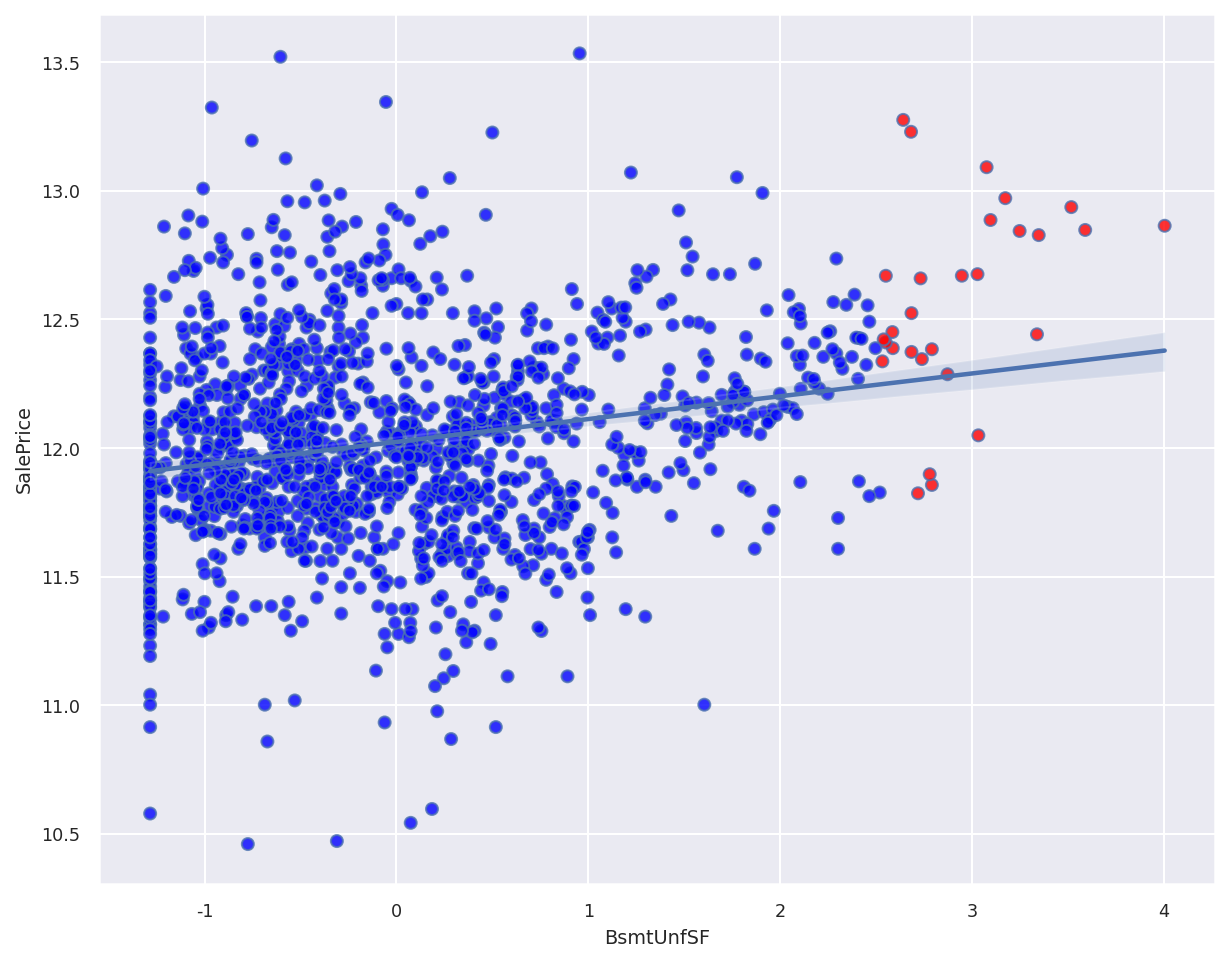

In [97]:
sns.regplot(x=scaled_ss_data['BsmtUnfSF'],
            y = c_huse_train_numeric_droped_target,
            scatter_kws={'facecolors': scaled_ss_data['BsmtUnfSF_col']})
plt.show()


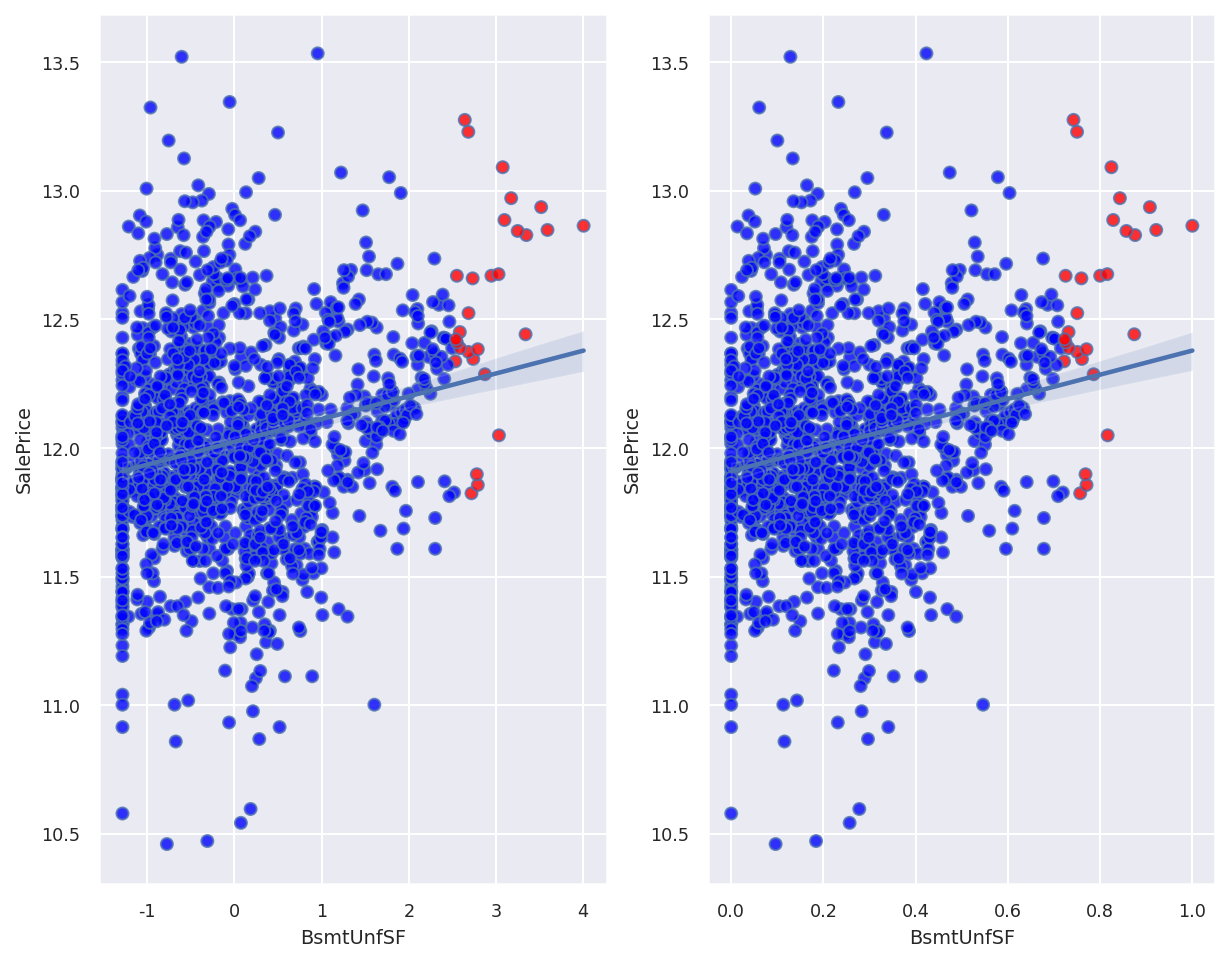

In [106]:
fig, ax = plt.subplots(ncols=2)
sns.regplot(x=scaled_ss_data['BsmtUnfSF'],
            y = c_huse_train_numeric_droped_target,
            scatter_kws={'facecolors': scaled_ss_data['BsmtUnfSF_col']}, ax=ax[0])
sns.regplot(x=scaled_mm_data['BsmtUnfSF'],
            y = c_huse_train_numeric_droped_target,
            scatter_kws={'facecolors': scaled_mm_data['BsmtUnfSF_col']}, ax=ax[1])
plt.show()

In [109]:
scaled_ss_data['BsmtUnfSF_col'][scaled_ss_data['BsmtUnfSF_col'] == 'red'].index

Int64Index([  22,   78,  137,  169,  224,  238,  278,  350,  477,  496,  552,
             581,  618,  678,  768,  774,  798,  803,  843,  928,  932,  963,
            1008, 1046, 1166, 1241, 1267, 1318, 1324],
           dtype='int64')

In [111]:
scaled_mm_data['BsmtUnfSF_col'][scaled_mm_data['BsmtUnfSF_col'] == 'red'].index

Int64Index([  22,   78,  137,  169,  224,  238,  278,  350,  477,  496,  552,
             581,  618,  678,  768,  774,  798,  803,  843,  928,  932,  963,
            1008, 1046, 1166, 1241, 1267, 1318, 1324],
           dtype='int64')

In [209]:
imsi = []
imsi1 = []
def find_outlier_max(data):
    for i in data.columns:
        if data[i].dtype != object:
#            imsi = []
#            imsi1 = []
            q1, q3 = np.percentile(data[i], [25, 75])
            iqr = q3 - q1
            lower_bound = q1 - (iqr * 1.5)
            upper_bound = q3 + (iqr * 1.5)
            # print(lower_bound)
            # print(upper_bound)
            upper_outlier_index = np.where(data[i] > upper_bound)
            lower_outlier_index = np.where(data[i] < lower_bound)
            imsi = []
            imsi1 = []
            for j in upper_outlier_index:
                imsi.append(data[i][j])
           
            
            for k in lower_outlier_index:
                imsi1.append(data[i][k])


            globals()[str(i)+'upper'] = imsi
            globals()[str(i)+'lower'] = imsi1
            globals()[str(i)+'max'] = upper_bound
            globals()[str(i)+'min'] = lower_bound
                

#            mask = np.where((data[i] > upper_bound) | (data[i]< lower_bound))
##            globals()[str(i)+'upper'] = imsi
##           globals()[str(i)+'lower'] = imsi1
#            globals()[str(i)+'q1'] = lower_bound
#            globals()[str(i)+'q3'] = upper_bound

            # a = i +'_col'
            # data[a] = 'blue'
            # for j in mask:
            #     data[a][j] = 'red'

In [210]:
find_outlier_max(scaled_ss_data)

In [211]:
LotFrontagemax

1.709176913527903

In [212]:
LotFrontageupper

[25       1.822709
 35       1.731883
 36       1.913535
 41       2.049774
 52       1.822709
 85       2.322252
 86       2.367665
 150      2.276839
 159      2.912621
 161      1.822709
 171      3.230512
 197      4.729141
 231      4.729141
 260      2.276839
 276      2.685556
 277      3.185099
 290      2.276839
 302      2.186013
 306      2.095187
 313      3.639229
 320      1.868122
 408      1.777296
 429      2.730969
 446      3.048860
 473      1.822709
 523      2.730969
 662      2.276839
 673      1.822709
 774      1.822709
 807      3.366751
 825      2.004361
 889      2.640143
 906      2.095187
 909      3.593816
 934     11.041546
 963      2.367665
 966      2.730969
 991      2.322252
 1010     2.049774
 1061     2.276839
 1106     2.004361
 1107     4.456663
 1127     5.092445
 1151     2.912621
 1162     1.777296
 1168     2.276839
 1169     2.186013
 1173     3.094273
 1182     4.093359
 1211     3.730055
 1273     2.458491
 1298    11.041546
 1305     1.

In [228]:
LotFrontageupper[0].values
q1, q3 = np.percentile(LotFrontageupper[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
LotFrontageupper[0][LotFrontageupper[0] > upper_bound].index

Int64Index([197, 231, 934, 1127, 1298], dtype='int64')

In [214]:
LotFrontagelower[0].values
q1, q3 = np.percentile(LotFrontagelower[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
LotFrontagelower[0][LotFrontagelower[0] < lower_bound]

Series([], Name: LotFrontage, dtype: float64)

In [229]:
LotAreaupper[0].values
q1, q3 = np.percentile(LotAreaupper[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
LotAreaupper[0][LotAreaupper[0] > upper_bound].index

Int64Index([249, 313, 335], dtype='int64')

In [216]:
LotArealower[0].values
q1, q3 = np.percentile(LotArealower[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
LotArealower[0][LotArealower[0] > upper_bound]

Series([], Name: LotArea, dtype: float64)

In [230]:
MasVnrAreaupper[0].values
q1, q3 = np.percentile(MasVnrAreaupper[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
MasVnrAreaupper[0][MasVnrAreaupper[0] > upper_bound].index

Int64Index([58, 70, 115, 297, 691, 808, 1169], dtype='int64')

In [232]:
MasVnrArealower[0].values
q1, q3 = np.percentile(MasVnrArealower[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
MasVnrArealower[0][MasVnrArealower[0] < lower_bound].index

IndexError: ignored

In [289]:
MiscValupper[0].values
q1, q3 = np.percentile(MiscValupper[0], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
MiscValupper[0][MiscValupper[0] > upper_bound].index

Int64Index([346, 705, 1230, 1457], dtype='int64')

In [287]:
MiscVallower[0]

Series([], Name: MiscVal, dtype: float64)

In [288]:
MiscValupper[0]

5       5.155844
7       4.591454
16      5.155844
17      4.881775
51      4.700114
84      5.155844
95      4.848535
98      4.700114
99      4.700114
106     4.795990
214     4.795990
249     4.881775
250     4.795990
335     5.155844
338     4.700114
346     7.682057
392     5.595137
439     5.264649
499     4.848535
502     4.700114
510     6.011658
539     6.011658
589     5.030263
611     4.881775
626     5.030263
634     5.030263
705     6.468085
725     4.881775
733     4.700114
760     4.795990
766     4.881775
767     5.660393
786     5.595137
794     4.881775
800     4.700114
812     3.079184
813     4.881775
867     4.700114
878     4.700114
890     6.011658
912     5.056973
953     4.700114
1061    4.974067
1076    4.881775
1083    5.155844
1171    5.720815
1210    4.700114
1230    7.172492
1252    5.030263
1328    5.560441
1386    6.011658
1457    6.193644
Name: MiscVal, dtype: float64

In [255]:
scaled_ss_data['1stFlrSF']

0      -0.803645
1       0.418479
2      -0.576677
3      -0.439421
4       0.112127
          ...   
1455   -0.465737
1456    1.981524
1457    0.228208
1458   -0.077721
1459    0.403472
Name: 1stFlrSF, Length: 1460, dtype: float64

In [258]:
2ndFlrSF

SyntaxError: ignored

Series([], Name: MasVnrArea, dtype: float64)

In [218]:
upper_columns = ['LotFrontageupper', 'LotAreaupper', 'MasVnrAreaupper', 'BsmtFinSF1upper', 'BsmtFinSF2upper',
       'BsmtUnfSFupper', 'TotalBsmtSFupper', '1stFlrSFupper', '2ndFlrSFupper', 'LowQualFinSFupper',
       'GrLivAreaupper', 'GarageAreaupper', 'WoodDeckSFupper', 'OpenPorchSFupper', 'EnclosedPorchupper',
       '3SsnPorchupper', 'ScreenPorchupper', 'PoolAreaupper', 'MiscValupper']

In [219]:
lower_columns = ['LotFrontagelower', 'LotArealower', 'MasVnrArealower', 'BsmtFinSF1lower', 'BsmtFinSF2lower',
       'BsmtUnfSFlower', 'TotalBsmtSFlower', '1stFlrSFlower', '2ndFlrSFlower', 'LowQualFinSFlower',
       'GrLivArealower', 'GarageArealower', 'WoodDeckSFlower', 'OpenPorchSFlower', 'EnclosedPorchlower',
       '3SsnPorchlower', 'ScreenPorchlower', 'PoolArealower', 'MiscVallower']

In [227]:
for i in upper_columns:
  q1, q3 = np.percentile(i[0], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
#  i[0][i[0] > upper_bound]
  print(i + '의 극단적 이상치는' + i[0][i[0] > upper_bound] + '입니다.')

UFuncTypeError: ignored

In [223]:
LotFrontagelower[0]

56     -2.082808
75     -2.219047
145    -2.082808
193    -2.082808
195    -2.082808
225    -2.219047
227    -2.219047
232    -2.219047
235    -2.219047
264    -1.810330
363    -2.219047
430    -2.219047
432    -2.082808
434    -2.219047
489    -2.219047
500    -2.219047
504    -2.082808
599    -2.082808
603    -1.810330
614    -2.219047
649    -2.219047
655    -2.219047
675    -2.082808
758    -2.082808
764    -1.810330
829    -2.082808
831    -1.810330
837    -2.219047
914    -1.810330
915    -2.219047
956    -2.082808
959    -2.082808
962    -2.082808
1007   -2.219047
1029   -2.219047
1038   -2.219047
1039   -2.219047
1088   -2.082808
1091   -2.082808
1104   -2.082808
1160   -2.082808
1191   -2.082808
1219   -2.219047
1291   -2.219047
1334   -2.082808
1364   -1.810330
1378   -2.219047
1449   -2.219047
Name: LotFrontage, dtype: float64

In [ ]:
            # q1_1, q3_1 = np.percentile(imsi[0], [25, 75])
            # iqr_1 = q3_1 - q1_1
            # lower_bound_1 = q1_1 - (iqr_1 * 1.5)
            # upper_bound_1 = q3_1 + (iqr_1 * 1.5)
            # imsi = imsi[0][imsi[0] > upper_bound_1]


            # q1_2, q3_2 = np.percentile(imsi1[0], [25, 75])
            # iqr_2 = q3_2 - q1_2
            # lower_bound_2 = q1_2 - (iqr_2 * 1.5)
            # upper_bound_2 = q3_2 + (iqr_2 * 1.5)
            # imsi1 = imsi1[0][imsi1[0] < lower_bound_2]


In [185]:
q1, q3 = np.percentile(LotFrontageupper[0].values, [25, 75])


In [171]:
LotFrontage_danger = scaled_ss_data['LotFrontage'][scaled_ss_data['LotFrontage'] > 4].index

In [172]:
LotFrontagelower

[56     -2.082808
 75     -2.219047
 145    -2.082808
 193    -2.082808
 195    -2.082808
 225    -2.219047
 227    -2.219047
 232    -2.219047
 235    -2.219047
 264    -1.810330
 363    -2.219047
 430    -2.219047
 432    -2.082808
 434    -2.219047
 489    -2.219047
 500    -2.219047
 504    -2.082808
 599    -2.082808
 603    -1.810330
 614    -2.219047
 649    -2.219047
 655    -2.219047
 675    -2.082808
 758    -2.082808
 764    -1.810330
 829    -2.082808
 831    -1.810330
 837    -2.219047
 914    -1.810330
 915    -2.219047
 956    -2.082808
 959    -2.082808
 962    -2.082808
 1007   -2.219047
 1029   -2.219047
 1038   -2.219047
 1039   -2.219047
 1088   -2.082808
 1091   -2.082808
 1104   -2.082808
 1160   -2.082808
 1191   -2.082808
 1219   -2.219047
 1291   -2.219047
 1334   -2.082808
 1364   -1.810330
 1378   -2.219047
 1449   -2.219047
 Name: LotFrontage, dtype: float64]

In [173]:
LotFrontagemin

-1.7422101967935966

In [149]:
scaled_ss_data.columns[:20]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'LotFrontage_col'],
      dtype='object')

In [132]:
list(scaled_ss_data['LotFrontage'])

[-0.22087508895451458,
 0.4603197354510445,
 -0.08463612407340275,
 -0.44794003042303426,
 0.6419716886258603,
 0.6873846769195642,
 0.23325479398252483,
 -0.03922313577969881,
 -0.8566569250663697,
 -0.9020699133600736,
 0.0061898525140051276,
 0.6873846769195642,
 -0.03922313577969881,
 0.9598626066817878,
 -0.03922313577969881,
 -0.8566569250663697,
 -0.03922313577969881,
 0.097015829101413,
 -0.17546210066081064,
 0.0061898525140051276,
 1.4139924896188272,
 -0.5841789953041461,
 0.23325479398252483,
 -1.1745478431222973,
 -0.03922313577969881,
 1.8227093842621627,
 -0.44794003042303426,
 1.2777535247377154,
 -1.0383088782411856,
 -0.44794003042303426,
 -0.9020699133600736,
 -0.03922313577969881,
 0.6873846769195642,
 0.0061898525140051276,
 -0.44794003042303426,
 1.7318834076747547,
 1.9135353608495704,
 0.1878418056888209,
 -0.08463612407340275,
 -0.22087508895451458,
 0.6419716886258603,
 2.049774325730682,
 -0.03922313577969881,
 -0.03922313577969881,
 0.0061898525140051276,
 -

In [ ]:
for i in scaled_ss_data.columns[19:]:

In [ ]:
#scaled_ss_data = pd.DataFrame(scaled_ss_data)

In [ ]:
#scaled_ss_data.columns = list(huse_train_numeric_droped_columns)

In [ ]:
#house_train_numeric_droped_columns = ['LotFrontage',
# 'LotArea',
# 'MasVnrArea',
# 'BsmtFinSF1',
# 'BsmtUnfSF',
# 'TotalBsmtSF',
# '1stFlrSF',
# '2ndFlrSF',
# 'GrLivArea',
# 'GarageArea',
# 'WoodDeckSF',
# 'OpenPorchSF']

In [ ]:
# scaled_ss_data

In [ ]:
# c_huse_train_numeric_droped = c_huse_train_numeric_droped.fillna(c_huse_train_numeric_droped.loc[:, "LotFrontage"].median())

In [ ]:
# c_huse_train_numeric_droped.loc[:, "LotFrontage"].median()

In [ ]:
# c_huse_train_numeric_droped.loc[:, "LotFrontage"].mode()

In [ ]:
c_huse_train_numeric_droped.iloc[:, -1]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# 집값예측 모델 개발(현) 적용하기

In [ ]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y_target = c_huse_train_numeric_droped.iloc[:, -1]
X_features = scaled_ss_data

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

NameError: ignored

In [39]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error


# y_target = c_huse_train_numeric_droped.iloc[:, -1]
# X_features = scaled_mm_data

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# # LinearRegression, Ridge, Lasso 학습, 예측, 평가
# lr_reg = LinearRegression()
# lr_reg.fit(X_train, y_train)

# ridge_reg = Ridge()
# ridge_reg.fit(X_train, y_train)

# lasso_reg = Lasso()
# lasso_reg.fit(X_train, y_train)

# models = [lr_reg, ridge_reg, lasso_reg]
# get_rmses(models)

In [40]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# y_target = c_huse_train_numeric_droped['SalePrice']
# X_features = c_huse_train_numeric_droped.drop('SalePrice',axis=1, inplace=False)

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# # LinearRegression, Ridge, Lasso 학습, 예측, 평가
# lr_reg = LinearRegression()
# lr_reg.fit(X_train, y_train)

# ridge_reg = Ridge()
# ridge_reg.fit(X_train, y_train)

# lasso_reg = Lasso()
# lasso_reg.fit(X_train, y_train)

# models = [lr_reg, ridge_reg, lasso_reg]
# get_rmses(models)

In [41]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient(계수=상관관계를 숫자로 치환한거고 음/양 다 있음) 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


In [42]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat(하나의 데이터프레임으로 붙여줌)으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick(축axis) label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(18)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

NameError: ignored

In [43]:

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5)) # 교차검증 횟수를 5번 설정해줘서 값이 5개 나옴
        rmse_avg = np.mean(rmse_list) # 위에서 나온 값 5개의 평균
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))  # 소숫점 셋째자리에서 반올림
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)

NameError: ignored

In [44]:
# 5개의 폴드 세트로 학습한 후에도 여전히 라쏘의 경우 릿지 모델보다 성능이 떨어짐
# 릿지와 라쏘 모델에 대해 alpha 하이퍼 파라미터를 변화시키면서 최적값을 도출해보려고 함
# 앞으로 모델별로 최적화 하이퍼 파라미터 작업을 반복적으로 작업할것이므로 함수를 생성해줌
# model과 params(하이퍼파라미터 딕셔너리 객체)를 받아서 최적화 작업의 결과를 표시하는 함수

from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

NameError: ignored

In [45]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

NameError: ignored

In [46]:
################################################################################
########################### 변수명 수정 할 것
from scipy.stats import skew 
# 왜도(치우쳐진 정도)

# object가 아닌 숫자형 피처의 칼럼 index 객체 추출.
features_index = X_features.dtypes[X_features.dtypes != 'object'].index
# house_nonNa에 칼럼 index를 [ ]로 입력하면 해당하는 칼럼 데이터 세트 반환. apply lambda로 skew( ) 호출
skew_features = X_features[features_index].apply(lambda x : skew(x))
# skew(왜곡) 정도가 1 이상인 칼럼만 추출.
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

NameError: ignored

In [ ]:
X_features

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,-0.220875,-0.207142,0.512420,0.575425,-0.944591,-0.459303,-0.793434,1.161852,0.370333,0.351000,-0.752176,0.216503
1,0.460320,-0.091886,-0.573300,1.171992,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.060731,1.626195,-0.704483
2,-0.084636,0.073480,0.324081,0.092907,-0.301643,-0.313369,-0.627826,1.189351,0.515013,0.631726,-0.752176,-0.070361
3,-0.447940,-0.096897,-0.573300,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,0.383659,0.790804,-0.752176,-0.176048
4,0.641972,0.375148,1.365485,0.463568,-0.174865,0.199680,-0.045611,1.617877,1.299326,1.698485,0.780197,0.563760
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.357114,-0.260560,-0.573300,-0.973018,0.873321,-0.238122,-0.542435,0.795198,0.250402,-0.060731,-0.752176,-0.100558
1456,0.687385,0.266407,0.085887,0.759659,0.049262,1.104925,2.355701,-0.795163,1.061367,0.126420,2.033231,-0.704483
1457,-0.175462,-0.147810,-0.573300,-0.369871,0.701265,0.215641,0.065656,1.844744,1.569647,-1.033914,-0.752176,0.201405
1458,-0.084636,-0.080160,-0.573300,-0.865548,-1.284176,0.046905,-0.218982,-0.795163,-0.832788,-1.090059,2.168910,-0.704483


In [ ]:
###### 스탠다드 스케일의 경우 음수값이 있기 때문에 로그 변환시 해당값이 nan이 되버리기에 주의해야한다.
# c_huse_train_numeric_droped[skew_features_top.index] = np.log1p(c_huse_train_numeric_droped[skew_features_top.index])

In [ ]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
# c_huse_train_numeric_droped = pd.get_dummies(c_huse_train_numeric_droped)
# y_target = c_huse_train_numeric_droped['SalePrice']
# X_features = c_huse_train_numeric_droped.drop('SalePrice',axis=1, inplace=False)
#X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

ValueError: ignored

LinearRegression 로그 변환된 RMSE: 0.21
Ridge 로그 변환된 RMSE: 0.211
Lasso 로그 변환된 RMSE: 0.211


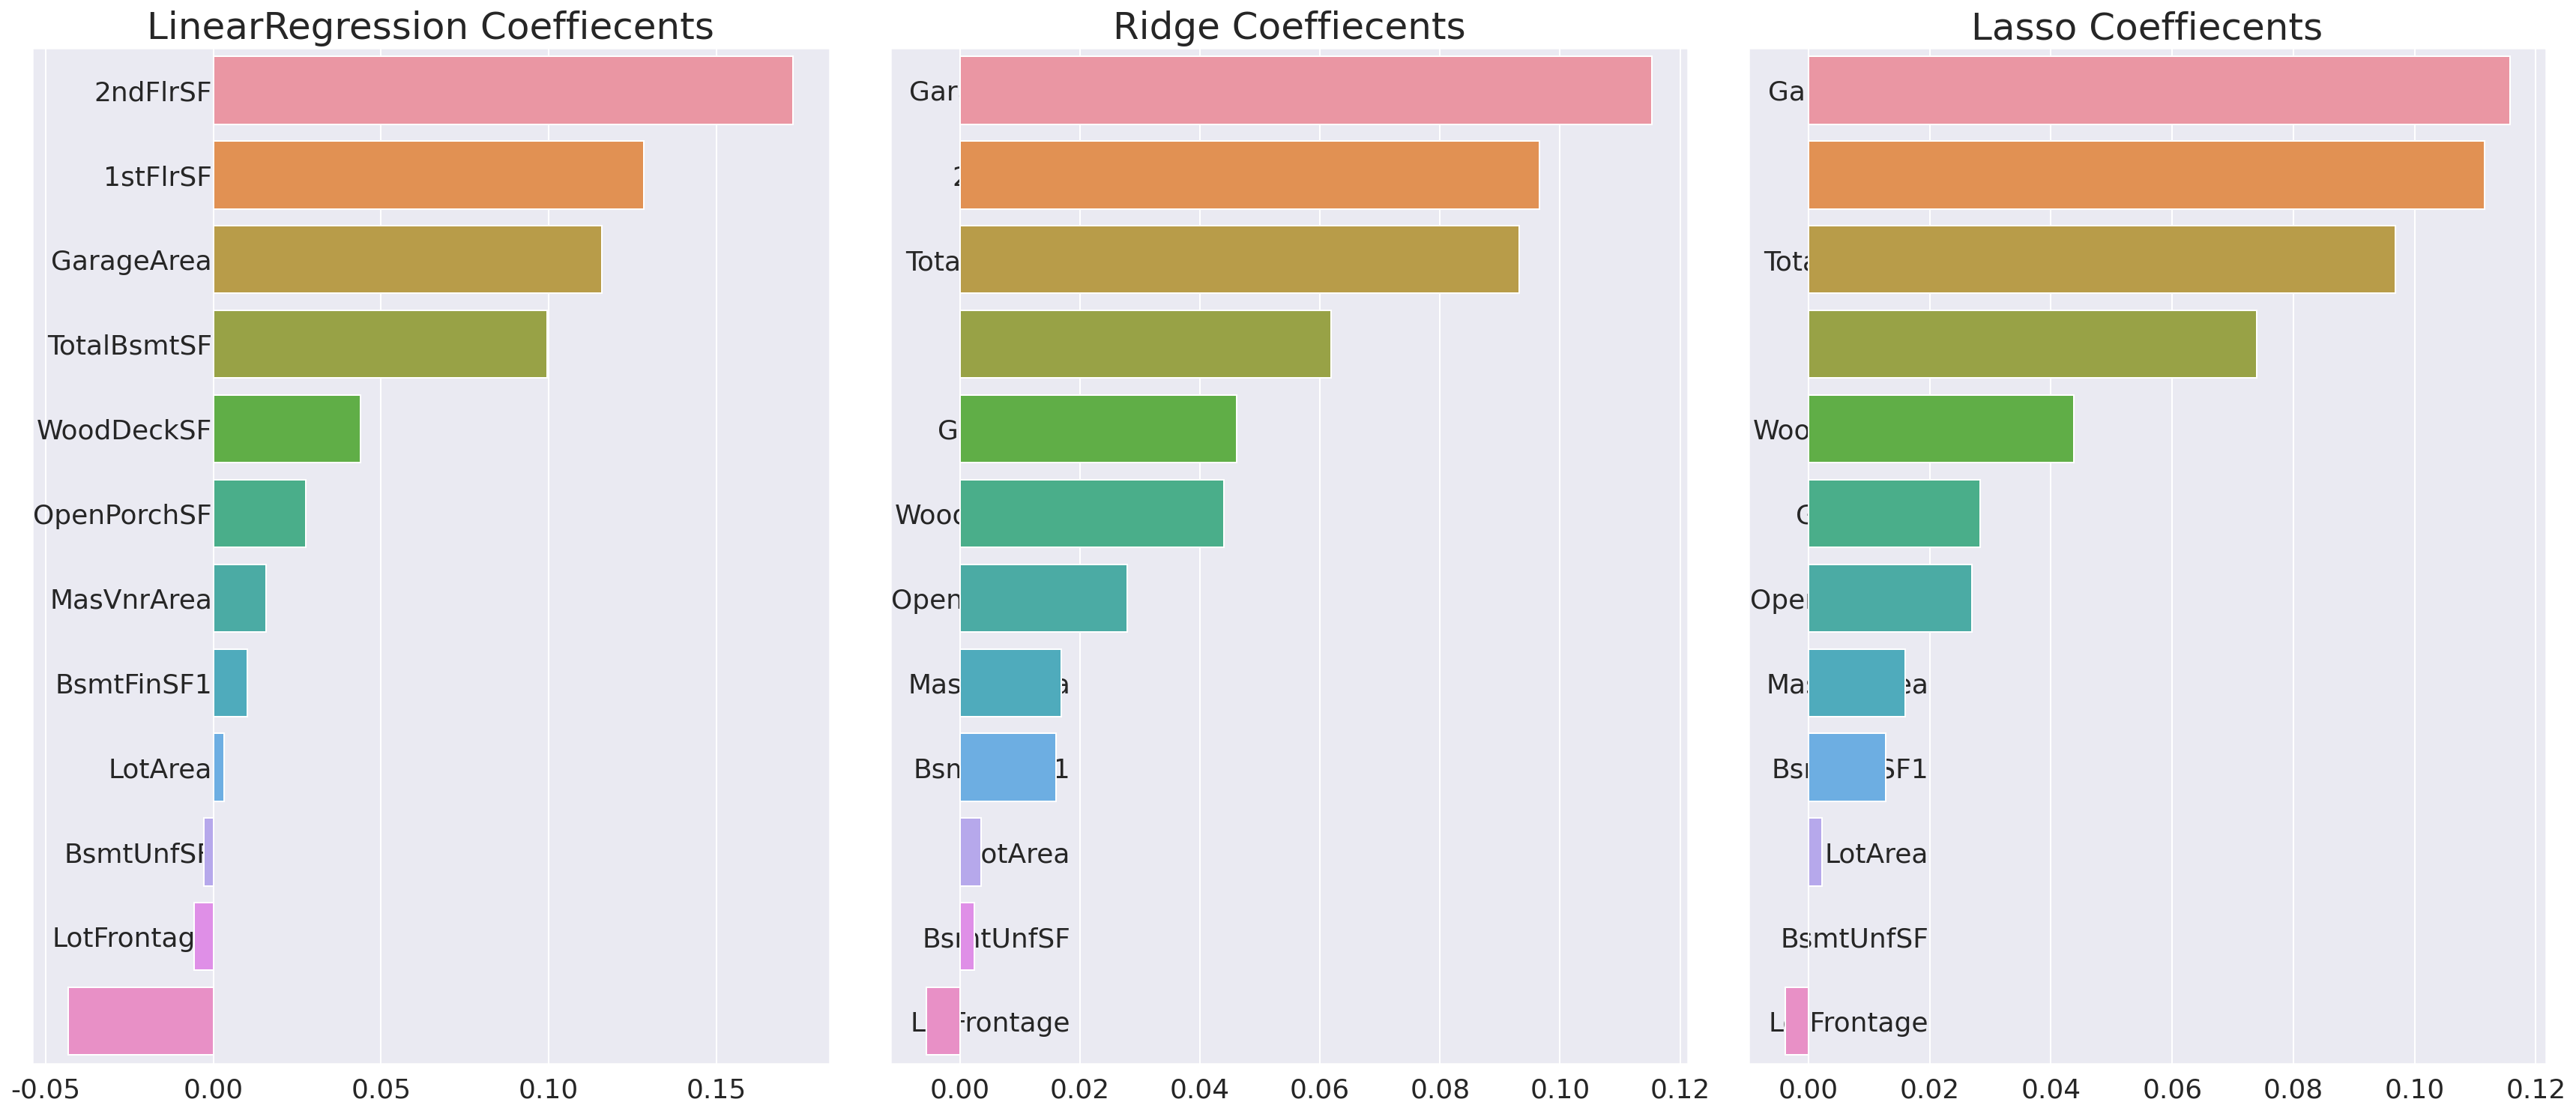

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

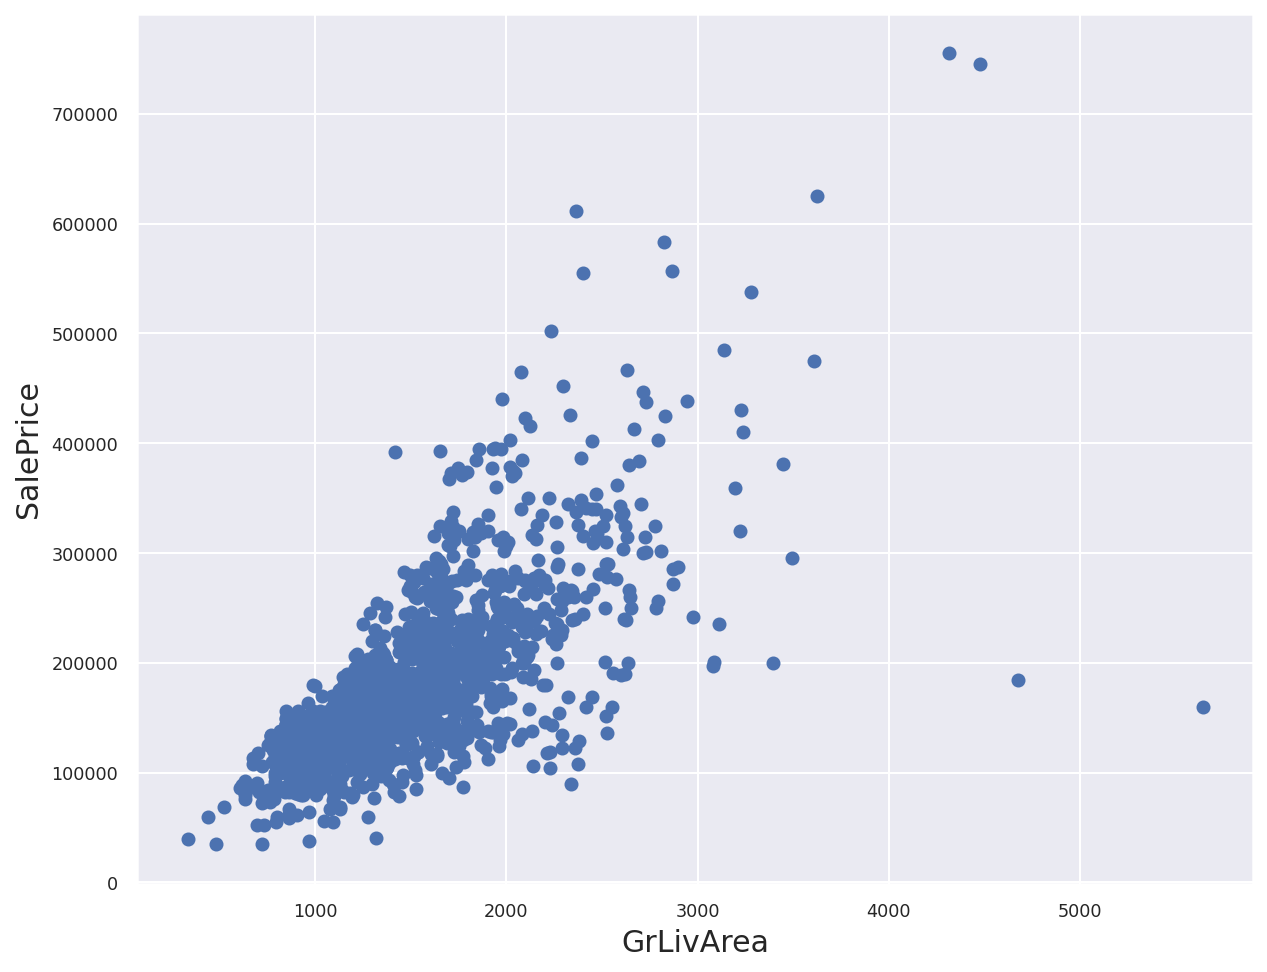

In [ ]:
plt.scatter(x = house_train['GrLivArea'], y = house_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [ ]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)


[09:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:17:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:17:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1859, 최적 alpha:{'n_estimators': 1000}


In [ ]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSE 값: 0.1868, 최적 alpha:{'n_estimators': 1000}


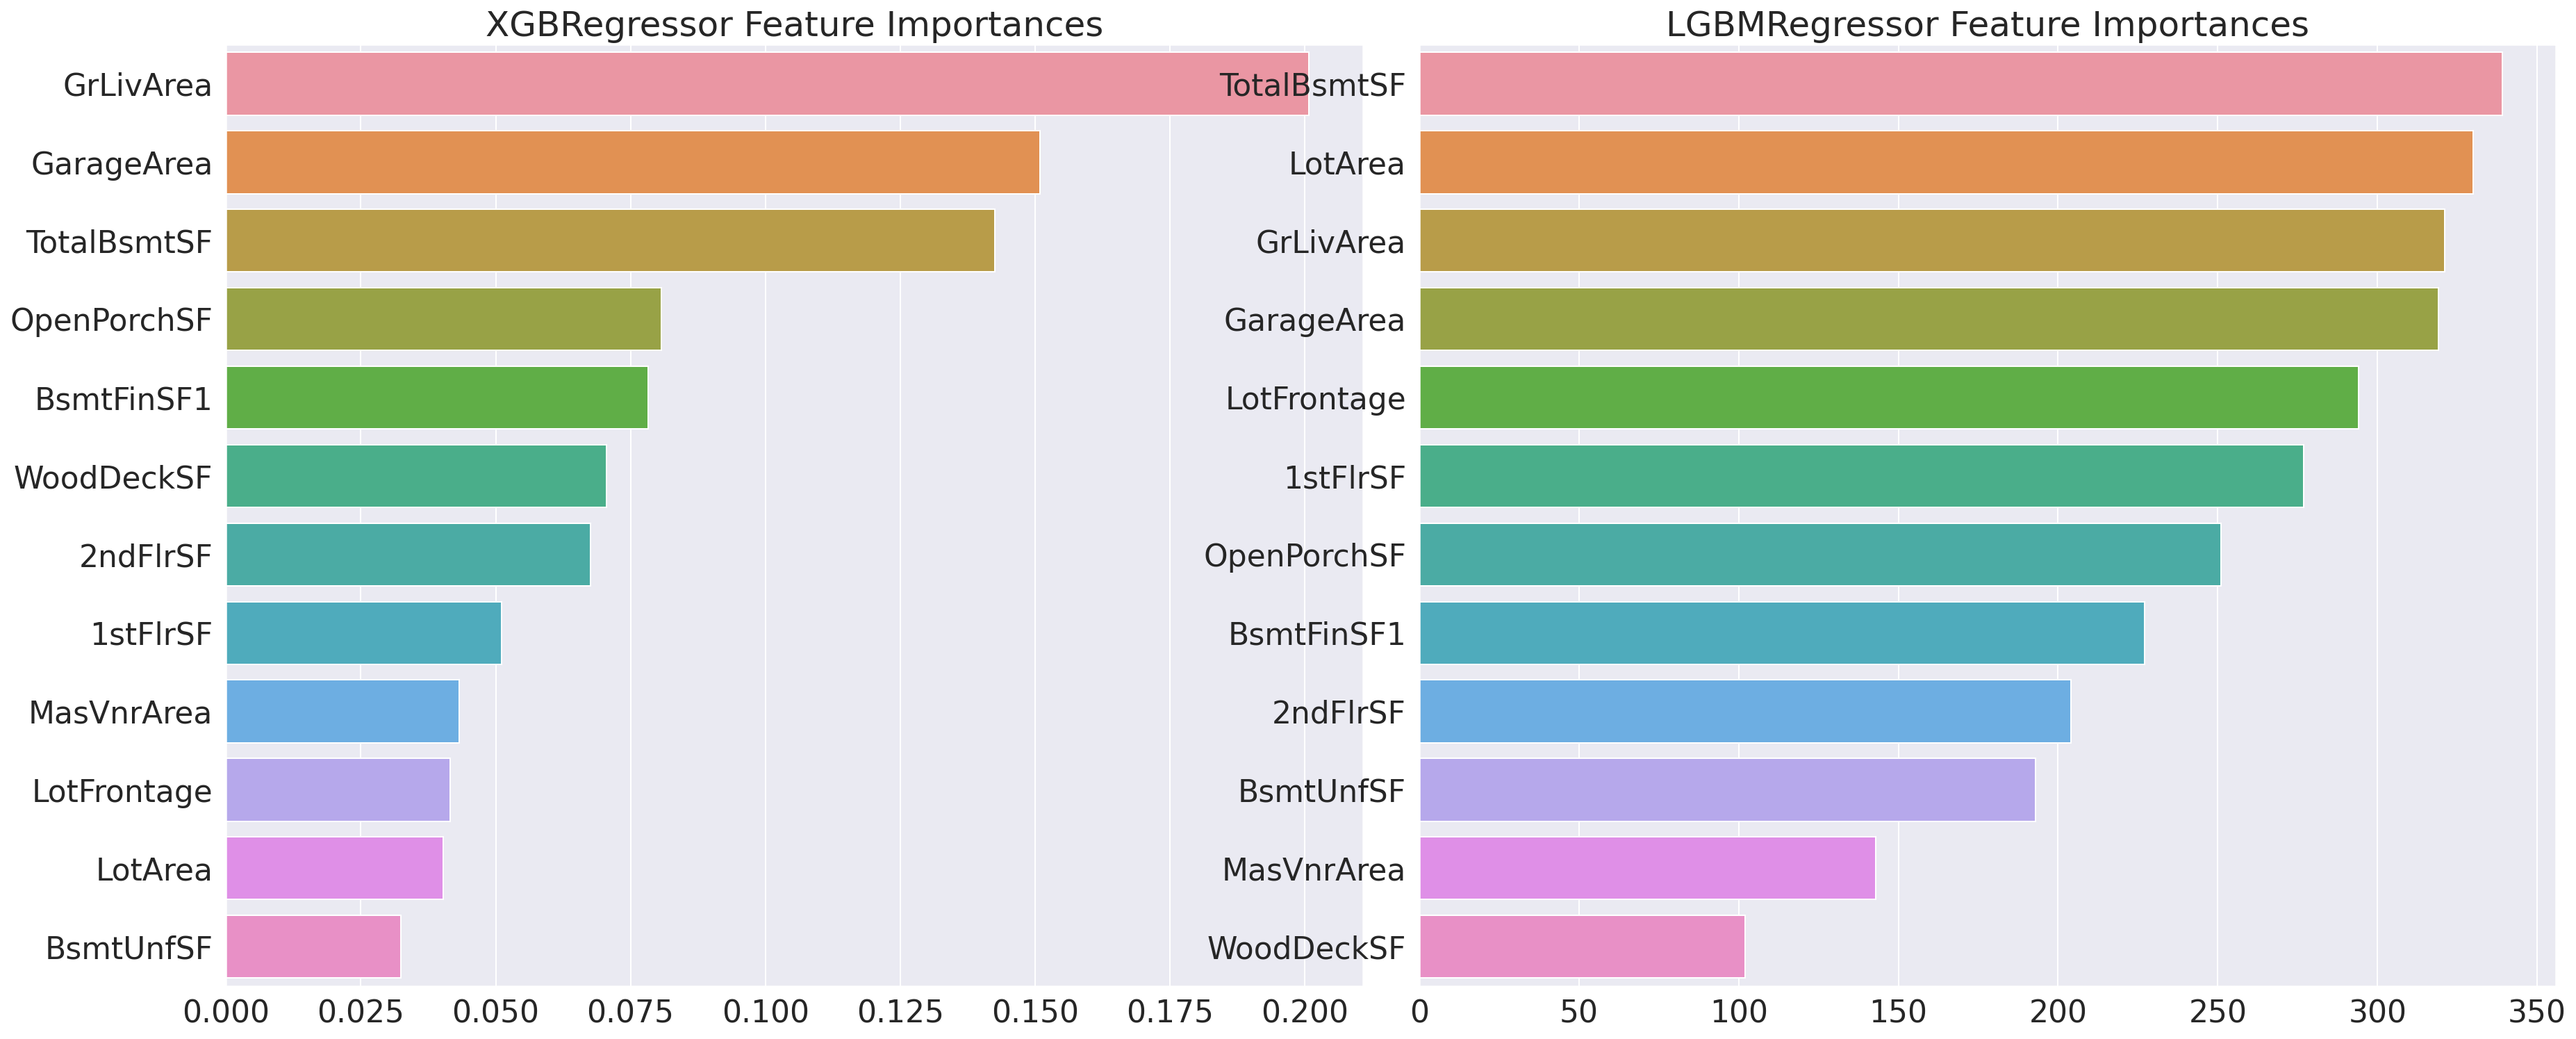

In [ ]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

# 앞 예제에서 print_best_params( )가 반환한 GridSearchCV로 최적화된 모델의 피처 중요도 시각화    
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [ ]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

# 개별 모델의 학습
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.2113240983506741
Ridge 모델의 RMSE: 0.21128617309812123
Lasso 모델의 RMSE: 0.21135607434452972


In [ ]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[09:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
최종 혼합 모델의 RMSE: 0.18277740314961144
XGBM 모델의 RMSE: 0.18534386084466756
LGBM 모델의 RMSE: 0.18506285506264872


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
# get_stacking_base_datasets( )은 넘파이 ndarray를 인자로 사용하므로 DataFrame을 넘파이로 변환. 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values

# 각 개별 기반(Base)모델이 생성한 학습용/테스트용 데이터 반환. 
ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[09:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[09:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[09:17:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[09:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[09:17:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  

In [ ]:
# 개별 모델이 반환한 학습 및 테스트용 데이터 세트를 Stacking 형태로 결합.  
Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델을 적용. 
meta_model_lasso = Lasso(alpha=0.0005)

#기반 모델의 예측값을 기반으로 새롭게 만들어진 학습 및 테스트용 데이터로 예측하고 RMSE 측정.
meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.18174714471236741


In [ ]:
 X_features.isna().sum()

LotFrontage    138
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF    130
1stFlrSF       175
2ndFlrSF         0
GrLivArea      226
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
dtype: int64

In [ ]:
|